**BANK CUSTOMER CHURN PROBLEM**

**Objective of the Model is to Identify  whether the Customer going to left the bank or not.**

I took the Dataset from the YBI foundation Github Page.

In [49]:
# import library

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [50]:
# import Dataset

df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [51]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [53]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [54]:
df.duplicated('CustomerId').sum()

0

In [55]:
df=df.set_index('CustomerId')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


**Encoding :-**

In [136]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [137]:
df['Geography'].value_counts()

Geography
2    5014
1    2509
0    2477
Name: count, dtype: int64

In [138]:
df['Gender'].value_counts()

Gender
0    5457
1    4543
Name: count, dtype: int64

In [139]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [140]:
df['Gender'].value_counts()

Gender
0    5457
1    4543
Name: count, dtype: int64

In [141]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [142]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [143]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [144]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [145]:
# feature Engineering

df.loc[(df['Balance']==0),'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [146]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

<Axes: >

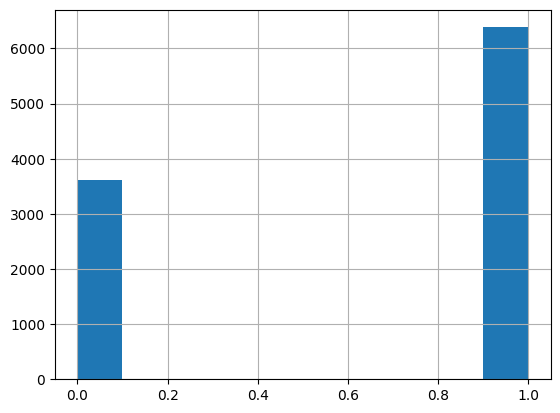

In [147]:
df['Zero Balance'].hist()

In [148]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [149]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

**Define Target Variable (y) and Feature Variables (X)**

In [150]:
y=df['Churn']

In [151]:
x=df.drop(['Surname','Churn'],axis=1)

In [152]:
x.shape,y.shape

((10000, 11), (10000,))

In [153]:
# Handle Imbalanced Data
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

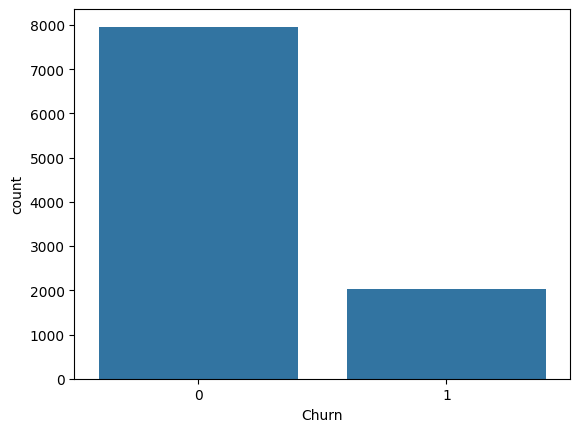

In [154]:
sns.countplot(x='Churn',data=df)

**Random UnderSampling**

In [155]:
from imblearn.under_sampling import RandomUnderSampler


In [156]:
rus=RandomUnderSampler(random_state=2529)

In [157]:
x_rus,y_rus=rus.fit_resample(x,y)

In [158]:
x_rus.shape,y_rus.shape

((4074, 11), (4074,))

In [159]:
x.shape,y.shape

((10000, 11), (10000,))

In [160]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [161]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

**Random OverSampling**

In [162]:
from imblearn.over_sampling import RandomOverSampler

In [163]:
ros=RandomOverSampler(random_state=2529)

In [164]:
x_ros,y_ros=ros.fit_resample(x,y)

In [165]:
x_ros.shape,y_ros.shape

((15926, 11), (15926,))

In [166]:
x.shape,y.shape

((10000, 11), (10000,))

In [167]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [168]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

**Train Test Split**

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2529)

In [171]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7000, 11), (3000, 11), (7000,), (3000,))

In [172]:
# train and test split for random undersampling

In [173]:
x_train_rus,x_test_rus,y_train_rus,y_test_rus=train_test_split(x_rus,y_rus,test_size=0.3,random_state=2529)

In [174]:
x_train_rus.shape,x_test_rus.shape,y_train_rus.shape,y_test_rus.shape

((2851, 11), (1223, 11), (2851,), (1223,))

In [175]:
# train and test split for Random underSampling data

In [176]:
x_train_ros,x_test_ros,y_train_ros,y_test_ros=train_test_split(x_ros,y_ros,test_size=0.3,random_state=2529)

In [177]:
x_train_ros.shape,x_test_ros.shape,y_train_ros.shape,y_test_ros.shape

((11148, 11), (4778, 11), (11148,), (4778,))

**Standardlize Feature**

In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
sc=StandardScaler()

In [180]:
# standardlize raw/original data

In [181]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [182]:
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [183]:
# Standardlize Random UnderSampling

In [184]:
x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [185]:
x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [186]:
# Standardlize Random Oversampling

In [187]:
x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [189]:
x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

**Model Selection**

In [190]:
from sklearn.svm import SVC

In [191]:
model=SVC()

**Model Training on Original/Raw Data**

In [195]:
model.fit(x_train,y_train)

SVC()

In [196]:
y_pred=model.predict(x_test)

**Model Accuracy and Recall**

In [202]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [198]:
accuracy_score(y_test,y_pred)

0.8436666666666667

In [199]:
print(confusion_matrix(y_test,y_pred))

[[2381   33]
 [ 436  150]]


In [203]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



By using Support vector classifier model on original data the model accuracy is good but the recall for the churn customer is not good.

**Model Training on Random UnderSampling Data**

In [206]:
model.fit(x_train_rus,y_train_rus)

SVC()

In [208]:
y_pred_rus=model.predict(x_test_rus)

In [209]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



By Handling the imbalanced data using random Undersampling and applying the Support Vector machine model the accuracy is decrease but the recall of churn customer increase.

In [210]:
model.fit(x_train_ros,y_train_ros)

SVC()

In [211]:
y_pred_ros=model.predict(x_test_ros)

In [212]:
print(classification_report(y_pred_ros,y_test_ros))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      2449
           1       0.74      0.76      0.75      2329

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



By Handling the imbalanced data using random Oversampling and applying Support Vector machine model,the accuracy is 75% and recall and precision for the customer who are going to left the Bank is increase.